In [1]:
!pip install kaggle  # تثبيت مكتبة Kaggle
from google.colab import files
files.upload()  # رفع ملف kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/  # رفع ملف kaggle.json إلى المكان المناسب
!chmod 600 ~/.kaggle/kaggle.json  # تخصيص الأذونات لملف kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store


Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
100% 4.28G/4.29G [00:35<00:00, 117MB/s]
100% 4.29G/4.29G [00:35<00:00, 129MB/s]


In [3]:
!unzip ecommerce-behavior-data-from-multi-category-store.zip


Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [5]:
print(os.listdir())  # قائمة الملفات الموجودة في الدليل الحالي


['.config', '2019-Oct.csv', '2019-Nov.csv', 'kaggle.json', 'ecommerce-behavior-data-from-multi-category-store.zip', 'sample_data']


In [6]:
file_name = '2019-Oct.csv'  # أو اسم الملف الصحيح بناءً على قائمة الملفات التي تم استخراجها

# التحقق من وجود الملف
if os.path.exists(file_name):
    data = pd.read_csv(file_name)
    print(data.head())  # عرض أول 5 صفوف للتأكد من تحميل البيانات بشكل صحيح
else:
    print(f"Error: File '{file_name}' not found in the current directory.")


                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fc

In [7]:
# تحويل عمود التاريخ إلى صيغة datetime (إذا كان موجودًا)
if 'event_time' in data.columns:
    data['event_time'] = pd.to_datetime(data['event_time'])

# حذف القيم المفقودة
data.dropna(inplace=True)

# حذف التكرارات
data.drop_duplicates(inplace=True)

# استعراض معلومات البيانات بعد التنظيف
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 26534109 entries, 1 to 42448762
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 2.0+ GB
None


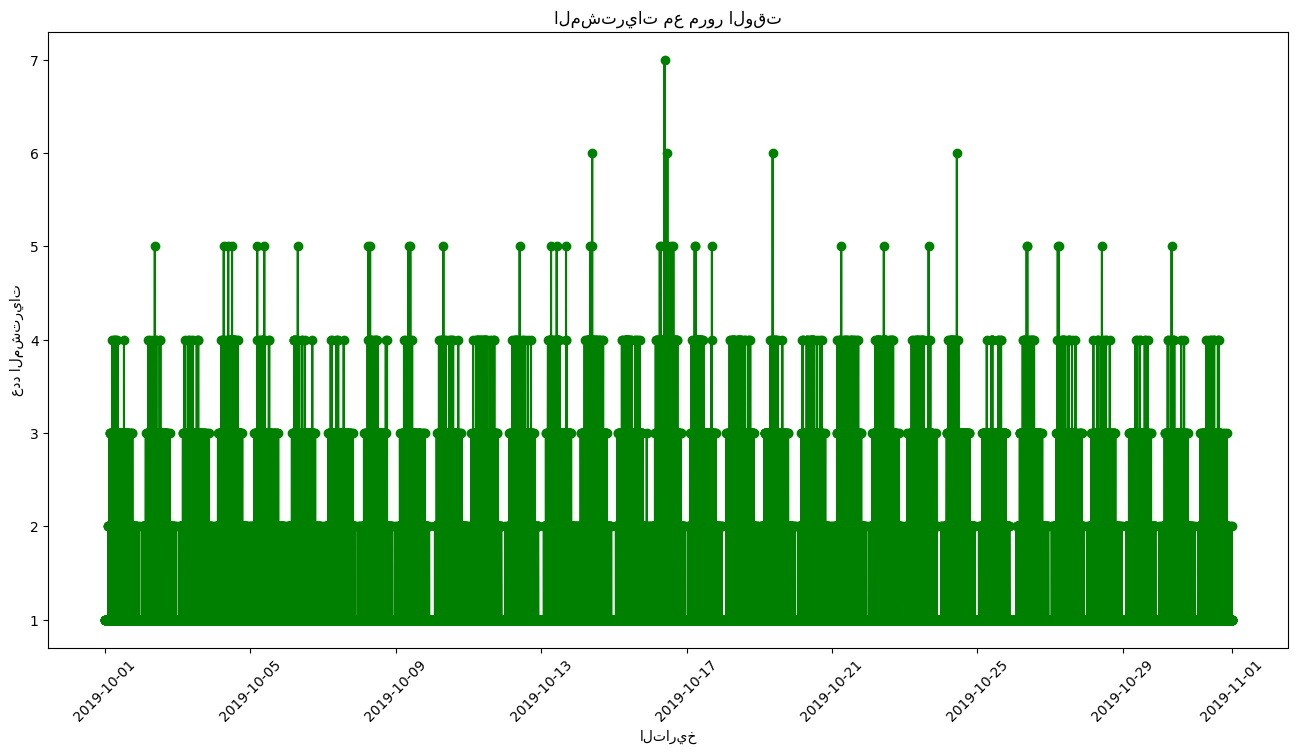

In [12]:
# تحليل المشتريات إذا كان هناك عمود 'event_type'
if 'event_type' in data.columns:
    if 'purchase' in data['event_type'].unique():
        purchases = data[data['event_type'] == 'purchase']
        purchases_by_date = purchases.groupby('event_time').size()

        plt.figure(figsize=(16, 8))
        plt.plot(purchases_by_date.index, purchases_by_date.values, marker='o', color='green')
        plt.title('المشتريات مع مرور الوقت')
        plt.xlabel('التاريخ')
        plt.ylabel('عدد المشتريات')
        plt.xticks(rotation=45)
        plt.show()


In [13]:
# تجزئة المستخدمين
if 'user_id' in data.columns:
    agg_dict = {}

    if 'session_duration' in data.columns:
        agg_dict['session_duration'] = 'mean'

    if 'event_type' in data.columns:
        agg_dict['event_type'] = 'count'

    if agg_dict:
        user_features = data.groupby('user_id').agg(agg_dict).rename(columns={'event_type': 'number_of_events'}).reset_index()
        print(user_features.head())

        if 'session_duration' in user_features.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=user_features, x='session_duration', y='number_of_events', hue='number_of_events', palette='viridis')
            plt.title('تجزئة العملاء')
            plt.xlabel('مدة الجلسة (متوسط)')
            plt.ylabel('عدد الأحداث')
            plt.show()
    else:
        print("لا توجد أعمدة مناسبة للتجميع.")


     user_id  number_of_events
0   33869381                 1
1  184265397                 4
2  195082191                 1
3  200673532                 4
4  208669541                 1


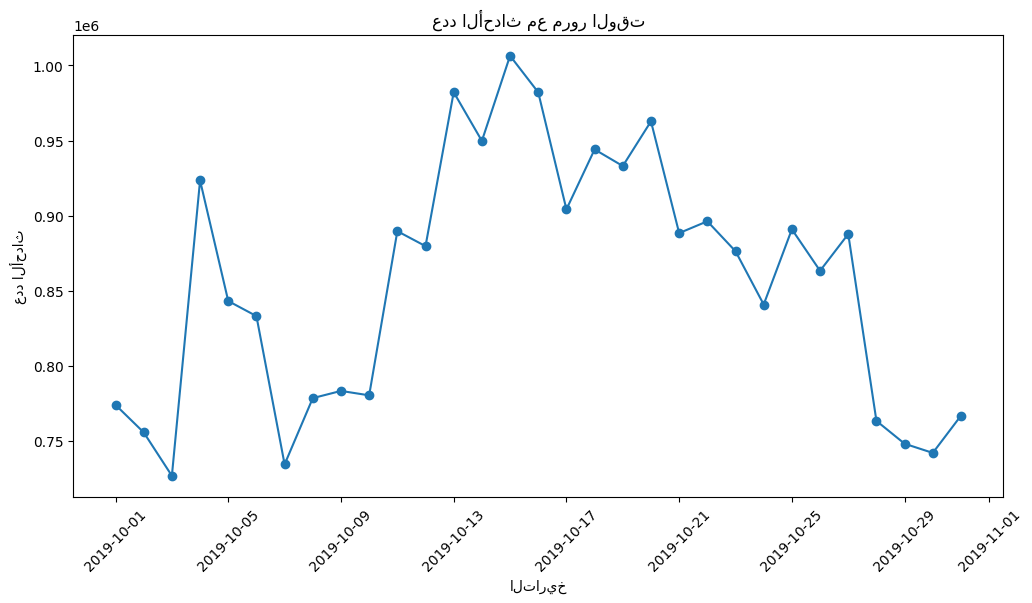

In [14]:
if 'event_time' in data.columns:
    data['date'] = data['event_time'].dt.date
    events_by_date = data.groupby('date').size()

    plt.figure(figsize=(12, 6))
    plt.plot(events_by_date.index, events_by_date.values, marker='o')
    plt.title('عدد الأحداث مع مرور الوقت')
    plt.xlabel('التاريخ')
    plt.ylabel('عدد الأحداث')
    plt.xticks(rotation=45)
    plt.show()


In [15]:
data.to_csv('ecommerce_behavior_data_cleaned.csv', index=False)
